
# 作業: 
    
    (1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化
    
    (2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [69]:
import keras
#from keras.datasets import cifar10
from keras.datasets import mnist 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy 


In [70]:
#    第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
 
model = Sequential()

#   第二步：構建網絡層
 
model.add(Dense( 500,input_shape=(784,))) # 輸入層，28*28=784   
model.add(Activation('relu')) # 激活函數是relu   

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
model.add(Activation('softmax')) # 最後一層用softmax作為激活函數

In [71]:
# 模型建立完成後，統計參數總量
print("Total Parameters：%d" % model.count_params())

Total Parameters：1149010


In [72]:
# 輸出模型摘要資訊
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 500)               392500    
_________________________________________________________________
activation_11 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 500)               250500    
_________________________________________________________________
activation_12 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 500)               250500    
_________________________________________________________________
activation_13 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 500)               250500    
__________

In [89]:
 '''
 SGD(隨機梯度下降) - Arguments
lr: float >= 0. Learning rate.
momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
decay: float >= 0. Learning rate decay over each update.
nesterov: boolean. Whether to apply Nesterov momentum.
'''

'''
RMSprop- Arguments
lr: float >= 0. Learning rate.
rho: float >= 0.
epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
decay: float >= 0. Learning rate decay over each update.
'''
opt = optimizers.Adam(lr=0.001, epsilon=None, decay=0.0)

# ADAM

In [74]:
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [78]:
#  第四步：資料分割
# 使用Keras自帶的mnist工具讀取數據（第一次需要聯網）
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# 由於mist的輸入數據維度是(num, 28 , 28)，這裡需要把後面的維度直接拼起來變成784維   
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2 ]) / 255.0
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2 ]) / 255.0
Y_train = (numpy.arange(10) == y_train[:, None]).astype(int)
Y_test = (numpy.arange(10) == y_test[:, None]).astype(int)


In [79]:

'''
   宣告並設定
   batch_size：對總的樣本數進行分組，每組包含的樣本數量
   epochs ：訓練次數
   
''' 
batch_size = 64
epochs = 20

In [80]:
# 第五步：訓練, 修正 model 參數
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


history = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3 )

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 3s - loss: 0.0498 - acc: 0.9839 - val_loss: 0.0254 - val_acc: 0.9921
Epoch 2/20
 - 3s - loss: 0.0193 - acc: 0.9937 - val_loss: 0.0231 - val_acc: 0.9926
Epoch 3/20
 - 3s - loss: 0.0137 - acc: 0.9954 - val_loss: 0.0229 - val_acc: 0.9928
Epoch 4/20
 - 3s - loss: 0.0101 - acc: 0.9967 - val_loss: 0.0207 - val_acc: 0.9939
Epoch 5/20
 - 3s - loss: 0.0086 - acc: 0.9972 - val_loss: 0.0227 - val_acc: 0.9939
Epoch 6/20
 - 3s - loss: 0.0071 - acc: 0.9976 - val_loss: 0.0218 - val_acc: 0.9944
Epoch 7/20
 - 3s - loss: 0.0060 - acc: 0.9979 - val_loss: 0.0232 - val_acc: 0.9941
Epoch 8/20
 - 3s - loss: 0.0057 - acc: 0.9982 - val_loss: 0.0241 - val_acc: 0.9940
Epoch 9/20
 - 3s - loss: 0.0049 - acc: 0.9983 - val_loss: 0.0299 - val_acc: 0.9933
Epoch 10/20
 - 3s - loss: 0.0042 - acc: 0.9986 - val_loss: 0.0261 - val_acc: 0.9944
Epoch 11/20
 - 3s - loss: 0.0041 - acc: 0.9987 - val_loss: 0.0244 - val_acc: 0.9944
Epoch 12/20
 - 3s - loss: 0.0044 - 

In [11]:
#    第六步：輸出
 
print ( " test set " )
scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
print ( "" )
#print ( " The test loss is %f " % scores)
print ( " The test loss is %f ", scores)
result = model.predict(X_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(Y_test, axis = 1 )

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

 test set 

 The test loss is %f  [0.04340142106520943, 0.9905500209331513]

 The accuracy of the model is 0.952200 


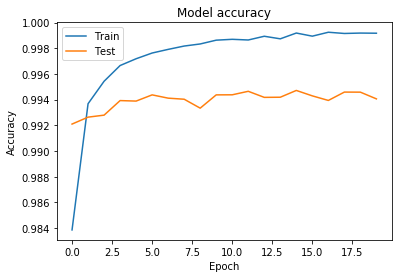

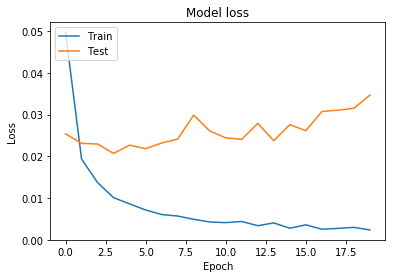

In [81]:
import matplotlib.pyplot as plt

%matplotlib inline

# history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# ADAM 
BATCH SIZE = 32

In [82]:
batch_size = 32
epochs = 20

import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

history = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3 )
 
print ( " test set " )
scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
print ( "" )
#print ( " The test loss is %f " % scores)
print ( " The test loss is %f ", scores)
result = model.predict(X_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(Y_test, axis = 1 )

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 5s - loss: 0.0064 - acc: 0.9982 - val_loss: 0.0288 - val_acc: 0.9938
Epoch 2/20
 - 5s - loss: 0.0047 - acc: 0.9985 - val_loss: 0.0286 - val_acc: 0.9947
Epoch 3/20
 - 5s - loss: 0.0042 - acc: 0.9988 - val_loss: 0.0256 - val_acc: 0.9946
Epoch 4/20
 - 5s - loss: 0.0040 - acc: 0.9990 - val_loss: 0.0390 - val_acc: 0.9922
Epoch 5/20
 - 5s - loss: 0.0040 - acc: 0.9989 - val_loss: 0.0317 - val_acc: 0.9942
Epoch 6/20
 - 5s - loss: 0.0034 - acc: 0.9991 - val_loss: 0.0315 - val_acc: 0.9944
Epoch 7/20
 - 5s - loss: 0.0039 - acc: 0.9988 - val_loss: 0.0274 - val_acc: 0.9950
Epoch 8/20
 - 5s - loss: 0.0037 - acc: 0.9990 - val_loss: 0.0325 - val_acc: 0.9940
Epoch 9/20
 - 5s - loss: 0.0040 - acc: 0.9989 - val_loss: 0.0284 - val_acc: 0.9950
Epoch 10/20
 - 5s - loss: 0.0028 - acc: 0.9992 - val_loss: 0.0285 - val_acc: 0.9952
Epoch 11/20
 - 5s - loss: 0.0032 - acc: 0.9991 - val_loss: 0.0356 - val_acc: 0.9941
Epoch 12/20
 - 5s - loss: 0.0039 - 

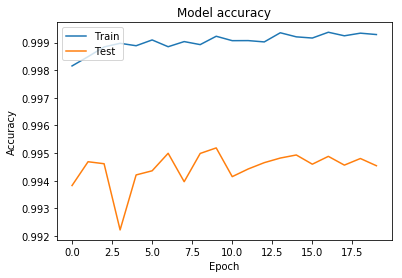

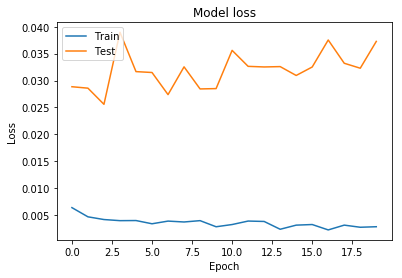

In [83]:
import matplotlib.pyplot as plt

%matplotlib inline

# history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# ADAM 
BATCH SIZE = 64

In [85]:
batch_size = 64
epochs = 20

import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

history = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3 )
 
print ( " test set " )
scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
print ( "" )
#print ( " The test loss is %f " % scores)
print ( " The test loss is %f ", scores)
result = model.predict(X_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(Y_test, axis = 1 )

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 3s - loss: 0.0019 - acc: 0.9995 - val_loss: 0.0278 - val_acc: 0.9954
Epoch 2/20
 - 3s - loss: 3.3088e-04 - acc: 0.9999 - val_loss: 0.0389 - val_acc: 0.9951
Epoch 3/20
 - 3s - loss: 1.4901e-04 - acc: 1.0000 - val_loss: 0.0383 - val_acc: 0.9954
Epoch 4/20
 - 3s - loss: 0.0021 - acc: 0.9995 - val_loss: 0.0332 - val_acc: 0.9948
Epoch 5/20
 - 3s - loss: 0.0018 - acc: 0.9995 - val_loss: 0.0326 - val_acc: 0.9953
Epoch 6/20
 - 3s - loss: 9.6714e-04 - acc: 0.9997 - val_loss: 0.0330 - val_acc: 0.9952
Epoch 7/20
 - 3s - loss: 0.0030 - acc: 0.9994 - val_loss: 0.0360 - val_acc: 0.9946
Epoch 8/20
 - 3s - loss: 0.0012 - acc: 0.9997 - val_loss: 0.0382 - val_acc: 0.9946
Epoch 9/20
 - 3s - loss: 0.0016 - acc: 0.9996 - val_loss: 0.0370 - val_acc: 0.9951
Epoch 10/20
 - 3s - loss: 0.0012 - acc: 0.9997 - val_loss: 0.0330 - val_acc: 0.9952
Epoch 11/20
 - 3s - loss: 1.1023e-04 - acc: 1.0000 - val_loss: 0.0354 - val_acc: 0.9956
Epoch 12/20
 - 3s -

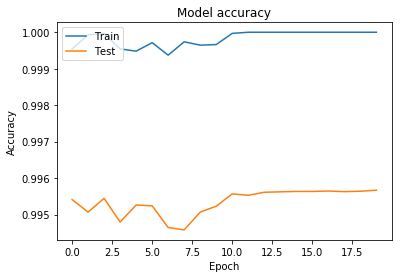

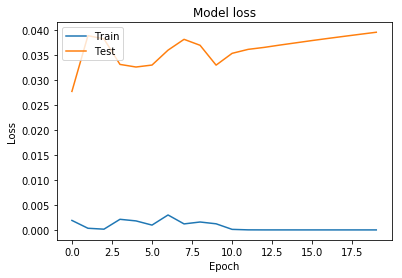

In [86]:
import matplotlib.pyplot as plt

%matplotlib inline

# history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# ADAM 
BATCH SIZE = 128

In [87]:
batch_size = 128
epochs = 20

import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

history = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3 )
 
print ( " test set " )
scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
print ( "" )
#print ( " The test loss is %f " % scores)
print ( " The test loss is %f ", scores)
result = model.predict(X_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(Y_test, axis = 1 )

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 2s - loss: 1.4763e-07 - acc: 1.0000 - val_loss: 0.0398 - val_acc: 0.9957
Epoch 2/20
 - 2s - loss: 1.4036e-07 - acc: 1.0000 - val_loss: 0.0400 - val_acc: 0.9957
Epoch 3/20
 - 1s - loss: 1.3419e-07 - acc: 1.0000 - val_loss: 0.0402 - val_acc: 0.9957
Epoch 4/20
 - 1s - loss: 1.2907e-07 - acc: 1.0000 - val_loss: 0.0404 - val_acc: 0.9957
Epoch 5/20
 - 1s - loss: 1.2476e-07 - acc: 1.0000 - val_loss: 0.0405 - val_acc: 0.9957
Epoch 6/20
 - 2s - loss: 1.2111e-07 - acc: 1.0000 - val_loss: 0.0407 - val_acc: 0.9957
Epoch 7/20
 - 2s - loss: 1.1805e-07 - acc: 1.0000 - val_loss: 0.0409 - val_acc: 0.9957
Epoch 8/20
 - 1s - loss: 1.1546e-07 - acc: 1.0000 - val_loss: 0.0411 - val_acc: 0.9957
Epoch 9/20
 - 1s - loss: 1.1331e-07 - acc: 1.0000 - val_loss: 0.0413 - val_acc: 0.9957
Epoch 10/20
 - 2s - loss: 1.1150e-07 - acc: 1.0000 - val_loss: 0.0414 - val_acc: 0.9957
Epoch 11/20
 - 1s - loss: 1.0997e-07 - acc: 1.0000 - val_loss: 0.0416 - val_acc

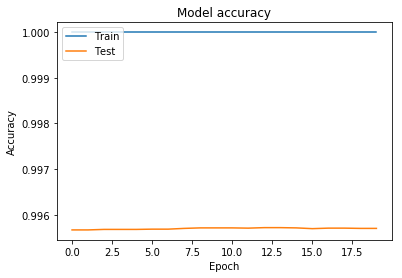

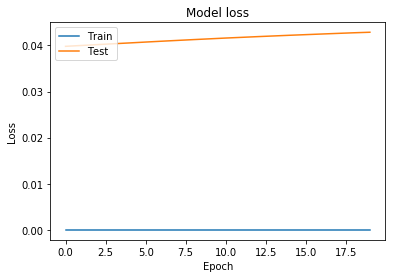

In [88]:
import matplotlib.pyplot as plt

%matplotlib inline

# history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# SGD

In [91]:
opt = optimizers.SGD(lr=0.001)

In [92]:
batch_size = 128
epochs = 20

import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

history = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3 )
 
print ( " test set " )
scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
print ( "" )
#print ( " The test loss is %f " % scores)
print ( " The test loss is %f ", scores)
result = model.predict(X_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(Y_test, axis = 1 )

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 2s - loss: 1.0349e-07 - acc: 1.0000 - val_loss: 0.0430 - val_acc: 0.9957
Epoch 2/20
 - 1s - loss: 1.0327e-07 - acc: 1.0000 - val_loss: 0.0431 - val_acc: 0.9957
Epoch 3/20
 - 1s - loss: 1.0307e-07 - acc: 1.0000 - val_loss: 0.0432 - val_acc: 0.9957
Epoch 4/20
 - 1s - loss: 1.0291e-07 - acc: 1.0000 - val_loss: 0.0433 - val_acc: 0.9957
Epoch 5/20
 - 1s - loss: 1.0277e-07 - acc: 1.0000 - val_loss: 0.0434 - val_acc: 0.9957
Epoch 6/20
 - 2s - loss: 1.0265e-07 - acc: 1.0000 - val_loss: 0.0435 - val_acc: 0.9957
Epoch 7/20
 - 1s - loss: 1.0256e-07 - acc: 1.0000 - val_loss: 0.0436 - val_acc: 0.9957
Epoch 8/20
 - 1s - loss: 1.0247e-07 - acc: 1.0000 - val_loss: 0.0437 - val_acc: 0.9957
Epoch 9/20
 - 1s - loss: 1.0240e-07 - acc: 1.0000 - val_loss: 0.0438 - val_acc: 0.9957
Epoch 10/20
 - 1s - loss: 1.0233e-07 - acc: 1.0000 - val_loss: 0.0438 - val_acc: 0.9957
Epoch 11/20
 - 2s - loss: 1.0228e-07 - acc: 1.0000 - val_loss: 0.0439 - val_acc

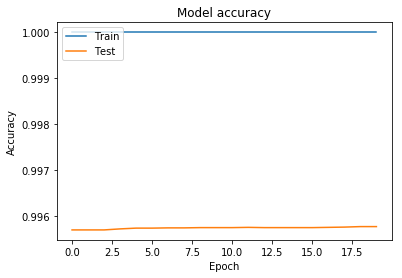

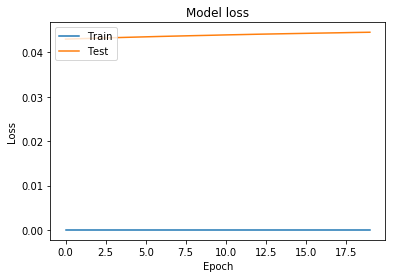

In [93]:
import matplotlib.pyplot as plt

%matplotlib inline

# history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# RMSprop

In [95]:
opt = optimizers.RMSprop(lr=0.001)

In [96]:
batch_size = 128
epochs = 20

import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

history = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3 )
 
print ( " test set " )
scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
print ( "" )
#print ( " The test loss is %f " % scores)
print ( " The test loss is %f ", scores)
result = model.predict(X_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(Y_test, axis = 1 )

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 2s - loss: 1.0202e-07 - acc: 1.0000 - val_loss: 0.0446 - val_acc: 0.9958
Epoch 2/20
 - 1s - loss: 1.0201e-07 - acc: 1.0000 - val_loss: 0.0446 - val_acc: 0.9958
Epoch 3/20
 - 1s - loss: 1.0200e-07 - acc: 1.0000 - val_loss: 0.0447 - val_acc: 0.9958
Epoch 4/20
 - 1s - loss: 1.0200e-07 - acc: 1.0000 - val_loss: 0.0447 - val_acc: 0.9958
Epoch 5/20
 - 1s - loss: 1.0199e-07 - acc: 1.0000 - val_loss: 0.0448 - val_acc: 0.9958
Epoch 6/20
 - 2s - loss: 1.0198e-07 - acc: 1.0000 - val_loss: 0.0448 - val_acc: 0.9958
Epoch 7/20
 - 2s - loss: 1.0198e-07 - acc: 1.0000 - val_loss: 0.0448 - val_acc: 0.9957
Epoch 8/20
 - 2s - loss: 1.0197e-07 - acc: 1.0000 - val_loss: 0.0449 - val_acc: 0.9957
Epoch 9/20
 - 2s - loss: 1.0197e-07 - acc: 1.0000 - val_loss: 0.0449 - val_acc: 0.9957
Epoch 10/20
 - 2s - loss: 1.0196e-07 - acc: 1.0000 - val_loss: 0.0449 - val_acc: 0.9957
Epoch 11/20
 - 1s - loss: 1.0196e-07 - acc: 1.0000 - val_loss: 0.0450 - val_acc